In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fasion_mnist.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(70000, 785)

In [4]:
df.sample()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59521,8,0,0,0,0,0,0,0,0,0,...,73,74,74,75,68,0,0,86,87,0


In [5]:
import matplotlib.pyplot as plt

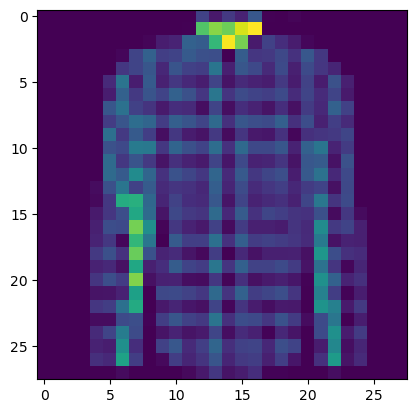

In [6]:
plt.imshow(df.iloc[3388,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X.shape, y.shape

((70000, 784), (70000,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model1 = LogisticRegression(max_iter=1000, random_state=42, n_jobs=1)

In [13]:
model1.fit(X_train, y_train)

C:\Users\Kashif Khan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, n_jobs=1, random_state=42)

In [14]:
import time
start = time.time()
y_pred1 = model1.predict(X_test)
end = time.time() - start
print ('Total Time Taken -  : ', end)

Total Time Taken -  :  0.12099385261535645


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.8427857142857142

## Using PCA

In [16]:
# mean center
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [20]:
X_train_tf = pca.fit_transform(X_train_scaled)
X_test_tf = pca.transform(X_test_scaled)

In [21]:
X_train.shape, X_train_tf.shape

((56000, 784), (56000, 100))

In [22]:
# Option 1: Logistic Regression (fast, good baseline)
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression(max_iter=1000, random_state=42, n_jobs=1)
model_pca.fit(X_train_tf, y_train)

C:\Users\Kashif Khan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
start = time.time()
y_pred_pca = model_pca.predict(X_test_tf)
end = time.time() - start
print('Total Time After PCA - ', end)

Total Time After PCA -  0.013998031616210938


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_pca)

0.8477857142857143